<a href="https://colab.research.google.com/github/agustincastellano/scripts/blob/master/HydroADP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando el entorno de trabajo

## Datos y constantes

In [0]:
# paquetes
import numpy as np
import pandas as pd
import cvxpy as cp

In [3]:
# url_demanda = 'https://raw.githubusercontent.com/aferragu/HydrothermalADP/master/datos/demanda.txt?token=AMCQ4IE6SLNCCZS2YJPMGIS5K4VLE'
# url_eolico = 'https://raw.githubusercontent.com/aferragu/HydrothermalADP/master/datos/eolico.txt?token=AMCQ4IDGWGSELGCRJKBJRVC5K4VHE'
# url_solar = 'https://raw.githubusercontent.com/aferragu/HydrothermalADP/master/datos/solar.txt?token=AMCQ4IHSFHLTUG62QDFKSLC5K4VIK'
Values=pd.read_csv('https://drive.google.com/open?id=15wPScMt0_ViM74t56d-zxQGbWvHqLtjW')
print(Values)

    <!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style>@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic')  ... };this.gbar_=this.gbar_||{};(function(_){var window=this;
0                                                 try{                                                                                                                                                                              ...                                                NaN       
1                                               var aa                                                                                                                                                                              ...                                                NaN       
2    if("function"==typeof Object.setPrototypeOf)da...                                                                            

In [6]:
# cargar demanda.txt, eolico.txt, solar.txt (de mi pc)
from google.colab import files
files.upload()

Saving paso328.csv to paso328.csv


{'paso328.csv': b'0.0.0.0.2,03E+08\r\n0.0.0.1.1,99E+08\r\n0.0.0.2.1,96E+08\r\n0.0.0.3.1,93E+08\r\n0.0.0.4.1,91E+08\r\n0.0.1.0.2,00E+08\r\n0.0.1.1.1,96E+08\r\n0.0.1.2.1,93E+08\r\n0.0.1.3.1,90E+08\r\n0.0.1.4.1,88E+08\r\n0.0.2.0.1,96E+08\r\n0.0.2.1.1,93E+08\r\n0.0.2.2.1,90E+08\r\n0.0.2.3.1,88E+08\r\n0.0.2.4.1,86E+08\r\n0.0.3.0.1,94E+08\r\n0.0.3.1.1,91E+08\r\n0.0.3.2.1,88E+08\r\n0.0.3.3.1,85E+08\r\n0.0.3.4.1,84E+08\r\n0.0.4.0.1,94E+08\r\n0.0.4.1.1,91E+08\r\n0.0.4.2.1,88E+08\r\n0.0.4.3.1,86E+08\r\n0.0.4.4.1,84E+08\r\n0.1.0.0.1,84E+08\r\n0.1.0.1.1,81E+08\r\n0.1.0.2.1,78E+08\r\n0.1.0.3.1,76E+08\r\n0.1.0.4.1,73E+08\r\n0.1.1.0.1,81E+08\r\n0.1.1.1.1,78E+08\r\n0.1.1.2.1,75E+08\r\n0.1.1.3.1,73E+08\r\n0.1.1.4.1,70E+08\r\n0.1.2.0.1,78E+08\r\n0.1.2.1.1,75E+08\r\n0.1.2.2.1,73E+08\r\n0.1.2.3.1,70E+08\r\n0.1.2.4.1,68E+08\r\n0.1.3.0.1,76E+08\r\n0.1.3.1.1,73E+08\r\n0.1.3.2.1,71E+08\r\n0.1.3.3.1,68E+08\r\n0.1.3.4.1,67E+08\r\n0.1.4.0.1,77E+08\r\n0.1.4.1.1,74E+08\r\n0.1.4.2.1,71E+08\r\n0.1.4.3.1,68E+08\r\n0.

In [19]:
Values=pd.read_csv('paso328.csv',delimiter='.',header=-1,decimal=',')
print(Values)

Values = Values.values.astype(float) 

     0  1  2  3            4
0    0  0  0  0  203000000.0
1    0  0  0  1  199000000.0
2    0  0  0  2  196000000.0
3    0  0  0  3  193000000.0
4    0  0  0  4  191000000.0
5    0  0  1  0  200000000.0
6    0  0  1  1  196000000.0
7    0  0  1  2  193000000.0
8    0  0  1  3  190000000.0
9    0  0  1  4  188000000.0
10   0  0  2  0  196000000.0
11   0  0  2  1  193000000.0
12   0  0  2  2  190000000.0
13   0  0  2  3  188000000.0
14   0  0  2  4  186000000.0
15   0  0  3  0  194000000.0
16   0  0  3  1  191000000.0
17   0  0  3  2  188000000.0
18   0  0  3  3  185000000.0
19   0  0  3  4  184000000.0
20   0  0  4  0  194000000.0
21   0  0  4  1  191000000.0
22   0  0  4  2  188000000.0
23   0  0  4  3  186000000.0
24   0  0  4  4  184000000.0
25   0  1  0  0  184000000.0
26   0  1  0  1  181000000.0
27   0  1  0  2  178000000.0
28   0  1  0  3  176000000.0
29   0  1  0  4  173000000.0
..  .. .. .. ..          ...
220  0  8  4  0   83800000.0
221  0  8  4  1   81300000.0
222  0  8  4  

## Funciones

**Ajuste cuadr�tico**

* Estado $x$: vector de $\mathbb R^3$ con nivel de Bonete, Palmar, Salto.

* $V(x)$ funci�n de valor, modelada como $V(x)= x^\top P x+ q^\top x+r$ con $P\succeq 0$ 




Dadas las parejas de datos:

$$\left(x_i,\beta_i\right) \quad i=0,\ldots,N-1 \quad \text{ donde } \beta_i=V(x_i)+e_i$$

que se obtienen a partir de la funcion de valor anterior en el paso de programación dinámica, con error de estimación $e_i$, se ajustan los parámetros  $P\in\mathbb R^{3\times 3}, q\in \mathbb R ^3, r\in\mathbb R $ como soluci�n de:

$$\min_{P,q,r} \sum_{i=0}^{N-1}\left(x_i^\top Px_i+q^\top x_i +r -V(x_i)\right)^2$$
$$s. to: P\succeq 0$$
<hr>
Este problema es equivalente a 

$$\min_{P,q,r,t} \sum_{i=0}^{N-1} t_i$$
$$\left(x_i^\top Px_i+q^\top x_i +r -V(x_i)\right)^2\leq t_i$$
$$s. to: P\succeq 0$$

que puede resolverse en CVXPY como muestra el siguiente ejemplo

<!-- Idea:

Reformular como un problema cl�sico de m�nimos cuadrados. El problema de arriba es equivalente a:

$$\min_{\mathbf a}||\mathbf Y \mathbf a - \mathbf b||_2^2$$

Donde:

$$\mathbf a^\top = \left[\begin{array}{l}p_{11}&p_{12}&p_{13}&p_{14}&p_{21}&\ldots&p_{44}&q_1&\ldots&q_4&r\end{array}\right]$$

y la $j$-�sima fila de $\mathbf Y$ es:

$$\mathbf Y_j = \left[\begin{array}{l}x_1^2&x_1x_2&x_1x_3&x_1x_4&x_1x_2&\ldots&x_4^2&x_1&\ldots&x_4&1\end{array}\right]$$ -->

In [23]:
def AjustarCuadratica(estados, costos):
  '''In: muestras de estados/costos
  estados - array de tama�o (4,M)
  costos - array de tama�o (M,)
  Out: P,q,r que ajustan x^\top P x +q^\top x +r'''
  
  N = estados.shape[0] # 3
  M = estados.shape[1]


  P=cp.Variable((N,N),PSD=True)
  q=cp.Variable(N)
  r=cp.Variable(1)                                                                   
  t=cp.Variable(M)

  cost=cp.sum(t)
  constraints=[]
  for i in range(0,M):
    beta_i=costos[i]
    x_i=estados[:,i]
    constraints.append(cp.sum_squares(cp.quad_form(x_i,P)+q*x_i+r-beta_i)<= t[i])

  prob = cp.Problem(cp.Minimize(cost),constraints)
  prob.solve(verbose=True,max_iters=10000)

  print("El costo óptimo es", prob.value)



  return P.value, q.value, r.value


#values=np.array(Values)
# Test
x = Values[:,1:4].T
V = Values[:,4] 

P,q,r = AjustarCuadratica(x, V)


print('P es:')
print(P)
print('q es:')
print(q)
print('r es:')
print(r)


----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 3026
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 510, constraints m = 1006
Cones:	linear vars: 250
	soc vars: 750, soc blks: 250
	sd vars: 6, sd blks: 1
Setup time: 6.54e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.21e+20  2.18e+20  1.00e+00 -1.28e+31  1.31e+27  6.03e+30  6.95e-03 
   100| 1.75e-01  2.11e+00  1.15e-01  8.57e+09  6.81e+09  9.11e-07  2.95e-02 
   200| 3.41e-02  1.72e-01  1.47e-02  6.88e+09  7.09e+09  2.33e-06  5

(array([607493.50576306, 174407.89601623, 312089.72251581]), array([[ 0.97733098,  0.14034044,  0.15852038],
       [ 0.1981144 , -0.34216574, -0.9185169 ],
       [ 0.07466482, -0.92910019,  0.36221264]]))
(array([0]),)
(array([25]),)
(array([50]),)
(array([75]),)
(array([100]),)
(array([125]),)
(array([150]),)
(array([175]),)
(array([200]),)
(array([225]),)
(array([5]),)
(array([30]),)
(array([55]),)
(array([80]),)
(array([105]),)
(array([130]),)
(array([155]),)
(array([180]),)
(array([205]),)
(array([230]),)
(array([10]),)
(array([35]),)
(array([60]),)
(array([85]),)
(array([110]),)
(array([135]),)
(array([160]),)
(array([185]),)
(array([210]),)
(array([235]),)
(array([15]),)
(array([40]),)
(array([65]),)
(array([90]),)
(array([115]),)
(array([140]),)
(array([165]),)
(array([190]),)
(array([215]),)
(array([240]),)
(array([20]),)
(array([45]),)
(array([70]),)
(array([95]),)
(array([120]),)
(array([145]),)
(array([170]),)
(array([195]),)
(array([220]),)
(array([245]),)


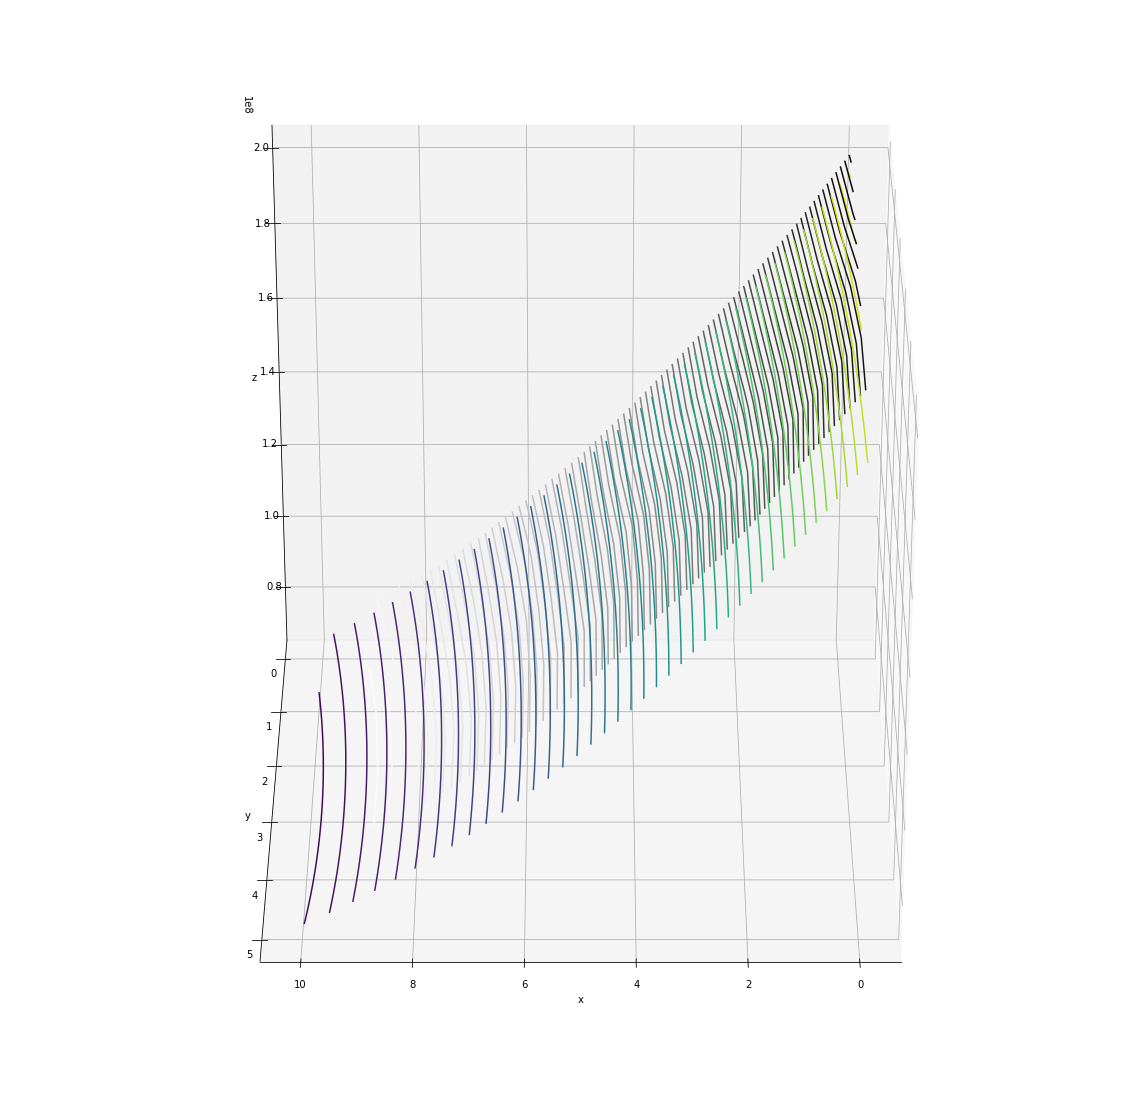

In [69]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
eigs=np.linalg.eig(P)
print(eigs)

def VeParametrica(X1,X2,x3):
  Z=np.zeros((100,100))
  for i in range(0,100):
    for j in range(0,100):
      x=np.array([X1[i,j],X2[i,j],x3])
      Z[i,j]= x.T@P@x+q.T@x+r
  return Z


def VePlanilla(X1,X2,x3):
  Z=np.zeros((5,10))
  for i in range(0,5):
    for j in range(0,10):
      x1=X1[i,j]
      x2=X2[i,j]
      k=np.where(np.all([x[0,:]==x1 , x[1,:]==x2, x[2,:]==x3] ,axis=0 ))
      
      print(k)
      Z[i,j]= V[k]
  return Z
  

x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 5, 100)

X1, X2 = np.meshgrid(x1, x2)
Z = VeParametrica(X1, X2,0)

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(0, 90)

x1 = np.arange(0, 10)
x2 = np.arange(0, 5)

X1, X2 = np.meshgrid(x1, x2)

Z = VePlanilla(X1, X2,0)


ax.contour3D(X1, X2, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(30, 90)

